# Supervised Machine Learning with Python I


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# Objectives

* Learn the basic principles of Machine Learning

* Get to know the `scikit-learn` library and how to use it for Machine Learning.

* Understand the close relationship between ML and optimization

* Learn how to do linear regression with `scikit-learn`

* Learn how to evaluate the results of training a regression algorithm


# Machine Learning


# `scikit-learn`

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

## Linear Regression as a model for Machine Learning

Linear regression finds an $h_\theta$ of the form:

$$ h_\theta(X) = \theta \cdot X = \theta_0 + \theta_1 \cdot X_1 + ... + \beta_n \cdot X_n$$


Notice that X is **fixed**: we have one set of data. Finding $h_\theta(X)$ means finding the values of $\theta$ that make $h_\theta(X)$ most similar to y.




### Cost (loss) function

Difference between  $h_\theta(X)$  and y

$$L(\theta) = h_\theta(X) - y$$

We need to minimize it: we need its derivative _with respect to $\theta_i$_

## ML is optimization of a loss function.

In the case of Linear Regression, we are lucky because we can get an analytic expression of the derivative. That means we can "teleport" to its minimum.

In many other algorithms we can't, but we can calculate the derivative numerically at any point we want. How can we use that to find the minima?

### Gradient descent

![Gradient Descent](http://cdn-images-1.medium.com/max/800/1*NRCWfdXa7b-ak2nBtmwRvw.png)

from [primo.ai](http://primo.ai/)

# Machine Learning with Python: `scikit-learn`

## Generate dummy data

We are going to generate fake data before we dive into real data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [17]:
n_samples = 300
n_features = 1

X, y = datasets.make_regression(n_samples, n_features, noise=20)

X.shape

(300, 1)

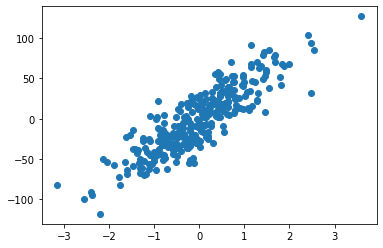

In [18]:
plt.scatter(X, y)

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [22]:
lr.fit(X, y)

LinearRegression()

In [23]:
lr.predict(X)

array([ 1.49932048e+01,  2.74054843e+01, -4.04531093e+01, -1.72980200e+01,
       -3.93692376e+01, -2.90130488e+01,  2.91492316e+00,  4.23065546e+01,
       -3.61655904e+01,  3.28860157e+01,  4.10474696e+01,  4.04930760e+01,
       -1.02024951e+01,  5.32597126e+01, -6.99690431e+00,  1.10909126e-01,
       -4.52874435e+00, -2.43888304e+00, -1.34587730e+00, -1.24188212e+01,
       -9.23610666e+01,  3.53179300e+01,  1.90431170e+01,  5.55908174e+01,
        4.08023705e+00,  1.89066702e+01, -6.81325814e+01,  8.02571446e-01,
       -3.29755507e+01, -3.92076064e+01,  7.83874467e+00, -3.37484718e+01,
        3.30901266e+00,  1.90703167e+01,  1.98682400e+01, -2.83578028e+01,
        6.44320719e+01,  5.94709102e+01, -6.38487544e+01,  3.50739755e+01,
        2.27270152e+01,  3.42265647e+01, -4.04847900e+01, -5.53113692e+00,
        4.13995853e+01, -1.53727885e+01, -1.46837995e+00, -8.57304398e+01,
        1.47341571e+01,  1.59395806e+01, -2.60396484e+01, -6.53475924e+00,
       -1.76980342e+01,  

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X, y)
rf.predict(X)

array([ 4.47250518e+01,  4.73334577e+01, -4.89527535e+01, -1.63170076e+01,
       -2.98813654e+01, -2.60339037e+01, -3.10274666e+00,  2.94180232e+01,
       -4.34730178e+01,  2.30098633e+01,  8.11820460e+01,  5.11201141e+01,
        3.13872729e+00,  5.23968928e+01, -4.06149592e+01,  1.14889977e+01,
       -4.34401845e+01, -1.50908707e+01, -2.46250000e+00, -7.51783932e+00,
       -9.66059445e+01,  4.44614598e+01,  8.13684559e+00,  6.72212780e+01,
        1.39678212e+01,  1.48715581e+01, -6.21297877e+01,  1.00740965e+01,
        9.88776426e+00, -3.68602021e+01,  1.17195213e+01, -2.77570825e+01,
        7.74760046e+00, -3.98705394e-02, -5.25776077e+00, -2.84603548e+01,
        5.14602763e+01,  7.67651191e+01, -7.28748303e+01,  2.26058041e+01,
        2.74010160e+01,  3.46139329e+01, -3.34348931e+01,  8.39409268e+00,
        6.78379232e+01, -1.17656743e+01,  8.68898744e+00, -9.47879425e+01,
        1.14023240e+01,  3.09140967e+01, -2.79857680e+01, -9.88691774e+00,
       -3.35684088e+01,  

This time, rather than code our own gradient descent optimizer, we will use `scikit-learn`

## The `Estimator` interface

In scikit-learn, preprocessing, supervised and unsupervised learning algorithms share a uniform interface.

Al estimators have a `.fit()` method, which takes:

- X, a numpy array or scipy sparse matrix

- y, in the case of supervised learning. It is a one-dimensional numpy array containing target values.

Once fitted, `Estimators` can either:

- `.predict()` a new set of y values from an `X_test` array: classification, regression, clustering

- `.transform()` an input `X_test` array: preprocessing, dimensionality reduction, feature extraction...

## Fitting a LinearRegression with `sklearn`

In [28]:
lr = LinearRegression()

lr.predict(X)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [29]:
lr.coef_, lr.intercept_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [31]:
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([36.02136086]), 0.04969937655626089)

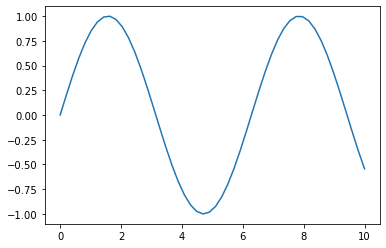

In [34]:
xs = np.linspace(0, 10)
ys = np.sin(xs)

plt.plot(xs, ys)

#### Exercise

Plot the observations (`plt.scatter`) and the line that our `LinearRegression` has learned.

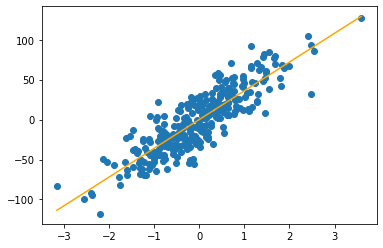

In [39]:
plt.scatter(X, y)

xs = np.linspace(min(X), max(X))
y_hat = lr.coef_ * xs + lr.intercept_

plt.plot(xs, y_hat, c='orange')

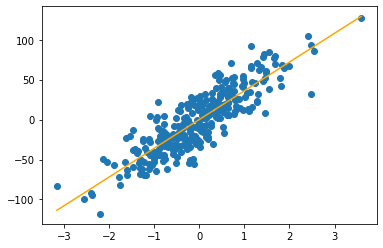

In [42]:
plt.scatter(X, y)

xs = np.linspace(min(X), max(X))
ys = lr.predict(xs)

plt.plot(xs, ys, c='orange')

In [48]:
# MSE

y_hat = lr.predict(X)
mse = np.mean((y - y_hat) ** 2)

# RMSE 
rmse = np.sqrt(mse)

mse, rmse

(383.2020494241877, 19.575547231793742)

In [50]:
np.mean(np.abs((y - y_hat)))

15.633880181906413

Is this a good estimate of the generalization error?

## Scoring and model validation

Our training set error will always be an optimistic estimate of our test set error.

We need to do a train, test split:

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape

(225, 1)

In [56]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

np.mean(np.abs(y_test - y_hat))

15.483248163714219

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.05)

lr = LinearRegression()

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

np.mean(np.abs(y_test - y_hat))

21.1068709037142

## Metrics for regression

MSE: Mean Squared Error

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - h(x_i))^2$$

MAE: Mean Absolute Error 

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - h(x_i)|$$

MAPE: Mean Absolute Percent Error

$$MAE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - h(x_i)|}{y_i}$$

Explained Variance:


$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$



We will learn more about scoring and model selection in a later module

# Regression algorithms in sklearn

We have already met Linear regression, which is a parametric algorithm. There are, however, _non-parametric_ algorithms that do not make assumption regarding the shape of the function to be approximated.

Let's try more sophisticated algorithms on our toy data and on real data.

In [170]:
from sklearn.datasets import fetch_openml, load_diabetes


diabetes = load_diabetes(as_frame=True)
diabetes_X = diabetes['data']
diabetes_y = diabetes['target']

diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### Exercise

Train a linear regression on the diabetes dataset. Calculate the test set MSE, RMSE, and MAE.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

In [184]:
results_diabetes = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'])
results_diabetes.loc['linear_regression'] = [mae, mse, rmse]
results_diabetes

,MAE,MSE,RMSE
linear_regression,39.374884,2396.508625,48.954148


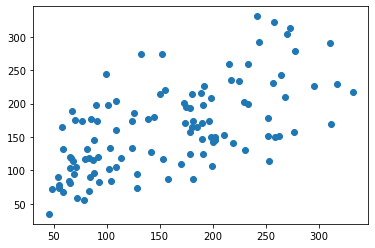

In [172]:
plt.scatter(y_test, y_hat)

<AxesSubplot:>

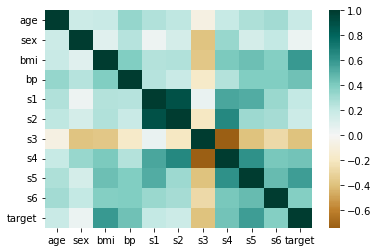

In [178]:
import seaborn as sns

with_target = diabetes_X.copy()
with_target['target'] = diabetes_y

sns.heatmap(with_target.corr(), cmap='BrBG', center=0)

In [190]:
type(np.nan)

float

In [195]:
housing = fetch_openml(name="house_prices", as_frame=True)
housing_X = housing['data']
housing_y = housing['target']

data = housing_X.select_dtypes('number')
data = data.fillna(data.median())
data = data.drop('Id', axis=1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(data, housing_y)

lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

mae, mse, rmse

(23556.103132281398, 1381772738.5377553, 37172.20384289524)

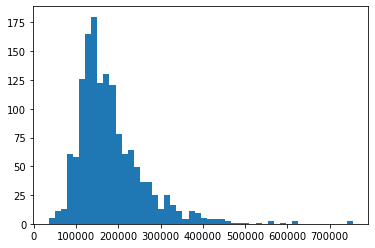

In [202]:
plt.hist(housing_y, bins=50);

In [206]:
results_housing = pd.DataFrame(columns=results_diabetes.columns)
results_housing.loc['linear_regression'] = [mae, mse, rmse]

In [207]:
results_housing

,MAE,MSE,RMSE
linear_regression,23556.103132,1.381773e+09,37172.203843


## K nearest neighbors

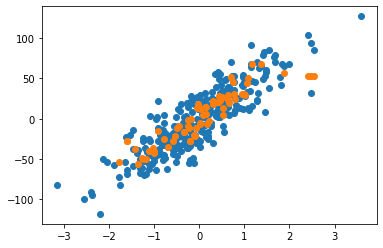

In [270]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X, y)


knn.fit(X_train, y_train)
y_hat = knn.predict(X_test)

plt.scatter(X, y)
plt.scatter(X_test, y_hat)

In [271]:
diabetes_X, diabetes_y

(          age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0.019908 

In [283]:
# Select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=5)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

# Learn on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_hat = knn.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_diabetes.loc['knn_5'] = [mae, mse, rmse]

In [284]:
# Select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=20)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

# Learn on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_hat = knn.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_diabetes.loc['knn_20'] = [mae, mse, rmse]

In [285]:
# Select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=50)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

# Learn on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_hat = knn.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_diabetes.loc['knn_50'] = [mae, mse, rmse]

In [286]:
results_diabetes

,MAE,MSE,RMSE
linear_regression,39.374884,2396.508625,48.954148
knn_5,51.095495,3951.942342,62.864476
knn_20,43.380180,2912.244279,53.965214
knn_50,50.055315,3522.112126,59.347385


#### Exercise 

Train several K neighbors classifiers (with 5, 20 and 50 neighbors) on the housing dataset. Measure their errors and annotate them into the results DataFrame

In [287]:
# Select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=5)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(data, housing_y)

# Learn on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_hat = knn.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_housing.loc['knn_5'] = [mae, mse, rmse]

In [288]:
# Select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=20)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(data, housing_y)

# Learn on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_hat = knn.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_housing.loc['knn_20'] = [mae, mse, rmse]

In [289]:
# Select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=50)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(data, housing_y)

# Learn on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_hat = knn.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_housing.loc['knn_50'] = [mae, mse, rmse]

In [290]:
results_housing

,MAE,MSE,RMSE
linear_regression,23556.103132,1.381773e+09,37172.203843
knn_5,26323.319452,1.840334e+09,42899.119711
knn_20,32250.753699,2.221287e+09,47130.536696
knn_50,34487.662521,2.679440e+09,51763.310347


In [294]:
normalized = data.copy()
normalized = (normalized - normalized.mean()) / normalized.std()
normalized

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.073350,-0.220799,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.513928,0.575228,-0.288554,...,0.350880,-0.751918,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730
1,-0.872264,0.460162,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.570555,1.171591,-0.288554,...,-0.060710,1.625638,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228
2,0.073350,-0.084607,0.073455,0.651256,-0.517023,0.984415,0.829930,0.325803,0.092875,-0.288554,...,0.631510,-0.751918,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730
3,0.309753,-0.447787,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.570555,-0.499103,-0.288554,...,0.790533,-0.751918,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186
4,0.073350,0.641752,0.375020,1.374324,-0.517023,0.951306,0.733056,1.366021,0.463410,-0.288554,...,1.697903,0.779930,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073350,-0.356992,-0.260471,-0.071812,-0.517023,0.918196,0.733056,-0.570555,-0.972685,-0.288554,...,-0.060710,-0.751918,-0.100523,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.620678,-0.614228
1456,-0.872264,0.687149,0.266316,-0.071812,0.381612,0.222899,0.151813,0.087881,0.759399,0.721865,...,0.126376,2.032535,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,1.644646
1457,0.309753,-0.175402,-0.147760,0.651256,3.077516,-1.002149,1.023678,-0.570555,-0.369744,-0.288554,...,-1.033560,-0.751918,0.201336,-0.359202,-0.116299,-0.270116,-0.068668,4.951415,-0.488943,1.644646
1458,-0.872264,-0.084607,-0.080133,-0.794879,0.381612,-0.704164,0.539309,-0.570555,-0.865252,6.090101,...,-1.089686,2.168167,-0.704242,1.473284,-0.116299,-0.270116,-0.068668,-0.087658,-0.858816,1.644646


In [295]:
# Select a model and hyperparameters
knn = KNeighborsRegressor(n_neighbors=20)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(normalized, housing_y)

# Learn on the training set
knn.fit(X_train, y_train)
# Predict on the test set
y_hat = knn.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_housing.loc['knn_20_normalized'] = [mae, mse, rmse]

In [296]:
results_housing

,MAE,MSE,RMSE
linear_regression,23556.103132,1.381773e+09,37172.203843
knn_5,26323.319452,1.840334e+09,42899.119711
knn_20,32250.753699,2.221287e+09,47130.536696
knn_50,34487.662521,2.679440e+09,51763.310347
knn_20_normalized,22173.771781,1.419504e+09,37676.310555


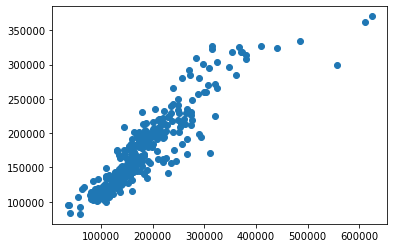

In [297]:
plt.scatter(y_test, y_hat)

## Decision Tree Regression


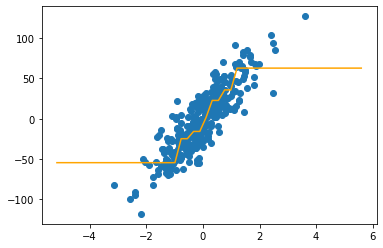

In [462]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10,
                           min_samples_leaf=20)

X_train, X_test, y_train, y_test = train_test_split(X, y)
dt.fit(X_train, y_train)

plt.scatter(X, y)
xs = np.linspace(min(X)-2, max(X)+2)
plt.plot(xs, dt.predict(xs), c='orange')

In [463]:
# Select a model and hyperparameters
dt = DecisionTreeRegressor(max_depth=4)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

# Learn on the training set
dt.fit(X_train, y_train)
# Predict on the test set
y_hat = dt.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_diabetes.loc['dt_4'] = [mae, mse, rmse]

In [473]:
# Select a model and hyperparameters
dt = DecisionTreeRegressor(max_depth=8)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y)

# Learn on the training set
dt.fit(X_train, y_train)
# Predict on the test set
y_hat = dt.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_diabetes.loc['dt_8'] = [mae, mse, rmse]

In [474]:
results_diabetes

,MAE,MSE,RMSE
linear_regression,39.374884,2396.508625,48.954148
knn_5,51.095495,3951.942342,62.864476
knn_20,43.380180,2912.244279,53.965214
knn_50,50.055315,3522.112126,59.347385
dt_4,45.829268,3229.504689,56.828731
dt_8,56.516056,5172.942469,71.923171


In [475]:
# Select a model and hyperparameters
dt = DecisionTreeRegressor(max_depth=4)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(normalized, housing_y)

# Learn on the training set
dt.fit(X_train, y_train)
# Predict on the test set
y_hat = dt.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_housing.loc['dt_4_normalized'] = [mae, mse, rmse]

In [477]:
# Select a model and hyperparameters
dt = DecisionTreeRegressor(max_depth=4)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(data, housing_y)

# Learn on the training set
dt.fit(X_train, y_train)
# Predict on the test set
y_hat = dt.predict(X_test)

# Evaluate
errors = y_test - y_hat
mae = np.mean(np.abs(errors))
mse = np.mean(errors ** 2)
rmse = np.sqrt(mse)

results_housing.loc['dt_4'] = [mae, mse, rmse]

In [478]:
results_housing

,MAE,MSE,RMSE
linear_regression,23556.103132,1.381773e+09,37172.203843
knn_5,26323.319452,1.840334e+09,42899.119711
knn_20,32250.753699,2.221287e+09,47130.536696
knn_50,34487.662521,2.679440e+09,51763.310347
knn_20_normalized,22173.771781,1.419504e+09,37676.310555
dt_4_normalized,26517.271312,1.415241e+09,37619.690136
dt_4,27623.649508,1.788561e+09,42291.384069


# Generalizability of our models

We want to train models on known data in order to make inferences (predictions) on unknown data.

How do we know how good our models are? 

## Overfitting

![Under- and overfitting](https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png)

from https://djsaunde.wordpress.com/2017/07/17/the-bias-variance-tradeoff/

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[Regression metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)